Coodigo de covarianza relacion lineal

In [ ]:

from google.colab import drive

drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import pandas as pd, numpy as np
data = pd.read_csv('/content/drive/MyDrive/Programación/Practica_regresion/Advertising.csv')

print(data)# comentario

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


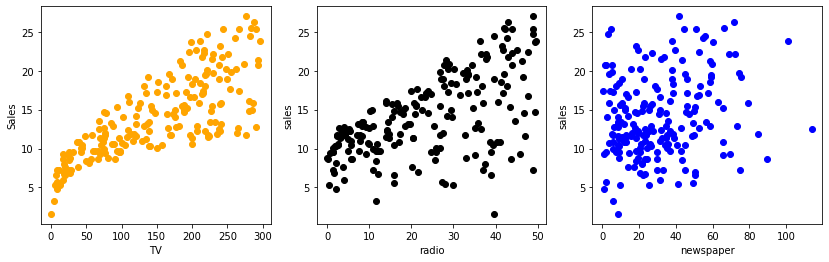

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(data['TV'], data['Sales'], color='orange')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1,3,2)
plt.scatter(data['Radio'], data['Sales'], color = 'black')
plt.xlabel('radio')
plt.ylabel('sales')

plt.subplot(1,3,3)
plt.scatter(data['Newspaper'], data['Sales'], color = 'blue')
plt.xlabel('newspaper')
plt.ylabel('sales')


plt.show()

La regresión lineal encuentra los parámetros de la línea que mejor se ajusta a los datos, es decir, la pendiente ($\theta_1$) y la constante o intercepto ($\theta_0$) en este caso.

$$h_\theta(x) = \theta_1x + \theta_0$$

La covarianza entre dos variables aleatorias $X$ e $Y$ se define como:
$$Cov(X, Y) = E[(X - E[X])(Y - E[Y])$$

Dado que las variables aleatorias $X$ e $Y$ son discretas y están definidas como $X = \{x_1, x_2,..., x_n\}$ y $Y = \{y_1, y_2,..., y_n\}$ con igual probabilidad para todos sus elementos entonces la covarianza se puede definir como:

$$Cov(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - E[X])(y_i - E[Y])$$

In [ ]:
col_namesx=['TV','Radio','Newspaper']

def covarianza(a,b):
  sum=0
  for i in range(len(a)):
    sum=sum+ (a[i]-a.mean())*(b[i]-b.mean())

  res=sum/len(a)
  return res

print(covarianza(data['TV'],data['Sales']))
print(covarianza(data['Radio'],data['Sales']))
print(covarianza(data['Newspaper'],data['Sales']))
print('Función------------------')
from numpy import cov
for col in col_namesx:
  print(np.cov(data[col],data['Sales'],bias=True)[0,1])

348.6382437499999
44.412509999999976
25.811684999999997
Función------------------
348.63824374999996
44.412509999999976
25.811684999999997


Todos con todos

In [ ]:
col_namesxy=['TV','Radio','Newspaper','Sales']
cov_todos=np.array([['    ']+col_namesxy])
#print(cov_todos)
#f=pd.DataFrame(m,columns=[col_namesx])
for col in col_namesxy:
  #fila=[]
  fila=[col]
  for colm in col_namesxy:
    fila.append(cov(data[col],data[colm],bias=False)[0,1])
    #print(fila)
  cov_todos=np.append(cov_todos,[fila],axis=0)

r=pd.DataFrame(cov_todos)
print(r)

           0                   1                   2                   3  \
0                             TV               Radio           Newspaper   
1         TV   7370.949893216087    69.8624924623115  105.91945226130643   
2      Radio    69.8624924623115  220.42774271356785  114.49697889447243   
3  Newspaper  105.91945226130643  114.49697889447243  474.30832562814095   
4      Sales  350.39019472361804  44.635688442211034   25.94139195979899   

                    4  
0               Sales  
1  350.39019472361804  
2  44.635688442211034  
3   25.94139195979899  
4   27.22185301507536  


# **Pearson correlación**

Dado un par de variables aleatorias ${\displaystyle (X,Y)}$, el coeficiente de correlación poblacional de Pearson (también denotado por ${\displaystyle \rho _{X,Y}}$) se define como

$${\displaystyle \rho _{X,Y}={\sigma _{XY} \over \sigma _{X}\sigma _{Y}}={\frac {\operatorname {Cov} (X,Y)}{\sqrt {\operatorname {Var} (X)\operatorname {Var} (Y)}}}}$$

donde

- ${\displaystyle \sigma _{XY}}$ es la covarianza de ${\displaystyle (X,Y)}$
- ${\displaystyle \sigma _{X}}$ es la desviación estándar de la variable ${\displaystyle X}$
- ${\displaystyle \sigma _{Y}}$ es la desviación estándar de la variable $Y$

TV 0.786155200865936
Radio 0.5791181653980452
Newspaper 0.22944625766448773


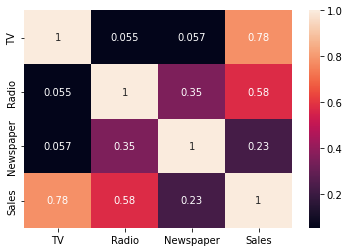

In [ ]:
import seaborn as sns
def pearson(x,y):
  p=(cov(x,y)[0,1])/((np.std(x))*(np.std(y)))
  return p

for c in col_namesx:
  print(c,pearson(data[c],data['Sales']))

sns.heatmap(data[col_namesxy].corr(),annot=True)

# **Error cuadrático medio (MSE) y Error Absoluto Medio (MAE)**

En nuestro caso función de costo es una función que calcula el error entre los valores de ventas (objetivo) predichos por nuestra hipótesis $h$ y la publicidad realizada en TV, radio o periódicos en el conjunto de entrenamiento.


- Error Cuadrático Medio (MSE, por sus sigles en inglés)

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x_i)- y_i)^2$$

- Error Absoluto Medio (MAE, por sus sigles en inglés)

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}|h_\theta(x_i)- y_i|$$

Aquí $h$ es el valor predicho por nuestro modelos $m$ es el número de muestras.


TV vs Sales
MSE=  13.876180027499993
MAE=  2.3473775000000003
Radio vs Sales
MSE=  9.820615985
MAE=  1.8139000000000005
Newspaper vs Sales
MSE=  27.04684649999998
MAE=  2.8329500000000003


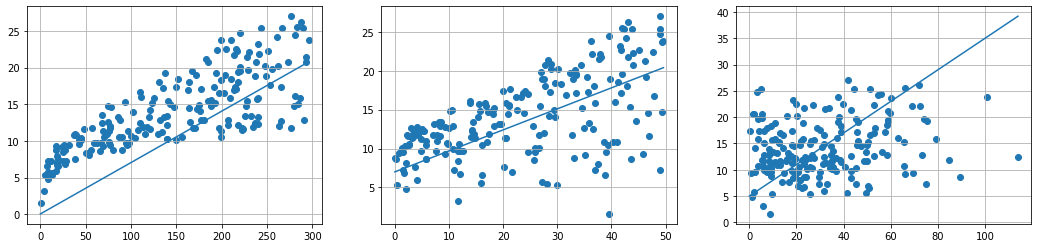

In [ ]:
t1=0.05
t2=0.07
def hipotesis(x,t0,t1):
  return t1*x +t0
def MSE(x,y,t1,t2): #Error Cuadratico Medio
  j0=0
  for i in range(len(x)):
    j0=j0+((hipotesis(x[i],t1,t2))-y[i])**2
  j0=j0*(1/(2*len(x)))
  return j0

def MAE(x,y,t1,t2): #error absoluto medio
  j0=0
  for i in range(len(x)):
    j0=j0+abs((hipotesis(x[i],t1,t2))-y[i])
  j0=j0*(1/(2*len(x)))
  return j0
#costo cal_costo



def plotpl(X,Y,t1,t0):
  x=np.linspace(0,X.max(),len(X))
  plt.scatter(X,Y) 
  plt.plot(x,hipotesis(x,t1,t0))
  plt.grid()

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plotpl(data['TV'],data['Sales'],t1,t2)
print('TV vs Sales')
print('MSE= ',MSE(data['TV'],data['Sales'],t1,t2))
print('MAE= ',MAE(data['TV'],data['Sales'],t1,t2))
plt.subplot(1,3,2)
t0r=7
t1r=0.27
print('Radio vs Sales')
print('MSE= ',MSE(data['Radio'],data['Sales'],t0r,t1r))
print('MAE= ',MAE(data['Radio'],data['Sales'],t0r,t1r))
plotpl(data['Radio'],data['Sales'],t0r,t1r)
plt.subplot(1,3,3)
t0n=5
t1n=0.3
print('Newspaper vs Sales')
print('MSE= ',MSE(data['Newspaper'],data['Sales'],t0n,t1n))
print('MAE= ',MAE(data['Newspaper'],data['Sales'],t0n,t1n))
plotpl(data['Newspaper'],data['Sales'],t0n,t1n)

# Mínimos cuadrados

In [ ]:
def min_cuad(x,y):
  n=len(x)
  x_sum=sum(x)
  y_sum=sum(y)
  xy_sum=sum(x.mul(y))
  x2_sum=sum(x.mul(x))
  a1=((n*xy_sum)-(x_sum*y_sum))/((n*x2_sum)-(x_sum)**2)
  a0=y.mean()-(a1*x.mean())
  return [a0,a1]



**Minimos cuadrados advertising**


In [ ]:
r_adv=min_cuad(data['TV'],data['Sales'])
print(r_adv)
print(MSE(data['TV'],data['Sales'],r_adv[0],r_adv[1]))
print(MAE(data['TV'],data['Sales'],r_adv[0],r_adv[1]))

r_adv=min_cuad(data['Radio'],data['Sales'])
print(r_adv)
print(MSE(data['Radio'],data['Sales'],r_adv[0],r_adv[1]))
print(MAE(data['Radio'],data['Sales'],r_adv[0],r_adv[1]))

r_adv=min_cuad(data['Newspaper'],data['Sales'])
print(r_adv)
print(MSE(data['Newspaper'],data['Sales'],r_adv[0],r_adv[1]))
print(MAE(data['Newspaper'],data['Sales'],r_adv[0],r_adv[1]))



[7.032593549127709, 0.04753664043301965]
5.2563264578283775
1.274903019463743
[9.31163809515829, 0.20249578339243937]
9.046198872562716
1.6601093988210331
[12.35140706927817, 0.054693098472273056]
12.837011360279845
2.0732798719192447



repetir hasta convergencia o se es alcanzado un número de épocas determinado {

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)$ (para todos los $j$)

}

Donde $\alpha$ es la tasa de aprendizaje

# Gradiente desendiente


# Uso de Gradiente Desendiente TV vs Sales 
La intencion es minimizar la función de coste para poder obtener un mejor ajuste


MSE algoritmo de gradiente desendiente

$$\theta_0 := \theta_0 - \alpha \frac{1}{2m}\frac{\partial}{\partial\theta_0}\sum_{i=1}^{m}(h_\theta(x_i)- y_i)^2$$
$$\theta_1 := \theta_1 - \alpha \frac{1}{2m}\frac{\partial}{\partial\theta_1}\sum_{i=1}^{m}(h_\theta(x_i)- y_i)^2$$

Tomando en cuenta que:

$$h_\theta(x) = \theta_1x + \theta_0$$

entonces resulta: 

$$\theta_0 := \theta_0 - \frac{\alpha}{m} \sum_{i=1}^{m}(h_\theta(x_i)- y_i)$$

$$\theta_1 := \theta_1 - \frac{\alpha}{m} \sum_{i=1}^{m}(h_\theta(x_i)- y_i)x_i$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


El minimo encontrado fue un MSE de:  80.65903509750002
Con un t0=  0.7
Con un t1=  0.01


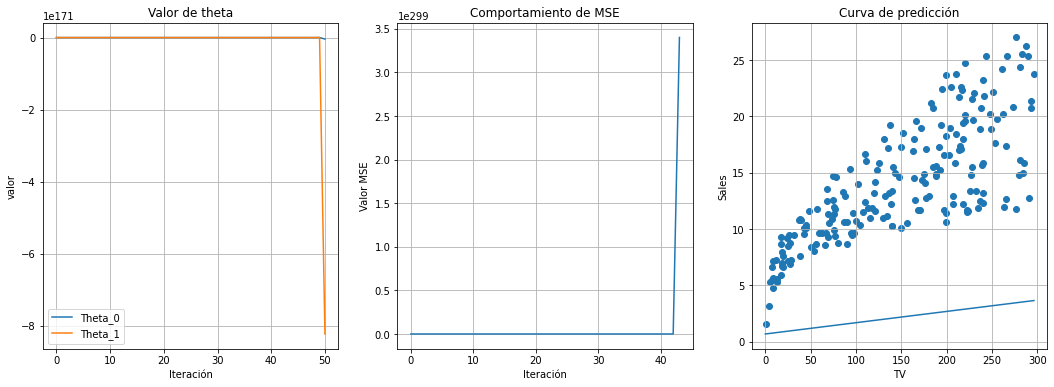

In [ ]:
#Uso de gradiente descendiente  COLOCAR TITULOS Y EJES
import random
alpha=0.1
theta1=0
t0=0.7
t1=0.01
def gradiente_mse(alfa,x,y,iteraciones,t0,t1):

  t0_list=[]
  t1_list=[]
  t0_list.append(t0)
  t1_list.append(t1)
  it=[]
  it.append(0)
  error_c=[]
  gd0=0
  gd1=0
  m=len(x)
  error_c.append(MSE(x,y,t0,t1))
  for i in range(1,iteraciones+1):
    for j in range(len(x)):
      gd1=gd1+((hipotesis(x[j],t0,t1)-y[j])*x[j])
      gd0=gd0+(hipotesis(x[j],t0,t1)-y[j])
      

    it.append(i)
    t0=t0-((alpha/m)*gd0)
    t1=t1-((alpha/m)*gd1)
    t0_list.append(t0)
    t1_list.append(t1)
    error_c.append(MSE(x,y,t0,t1))
  return [it,t0_list,t1_list,error_c]

resulgd=gradiente_mse(alpha,data['TV'],data['Sales'],50,t0,t1)
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mse_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)

plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MSE')
plt.title('Comportamiento de MSE')
plt.grid()

plt.subplot(1,3,3)
plotpl(data['TV'],data['Sales'],t0_r[mse_r.index(min(mse_r))],t1_r[mse_r.index(min(mse_r))])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MSE de: ',min(mse_r))
print('Con un t0= ',t0_r[mse_r.index(min(mse_r))])
print('Con un t1= ',t1_r[mse_r.index(min(mse_r))])

# Uso de Gradiente descendiente TV vs Sales 

MAE

$$\theta_0 := \theta_0 - \alpha \frac{1}{2m}\frac{\partial}{\partial\theta_0}\sum_{i=1}^{m}|h_\theta(x_i)- y_i|$$
$$\theta_1 := \theta_1 - \alpha \frac{1}{2m}\frac{\partial}{\partial\theta_1}\sum_{i=1}^{m}|h_\theta(x_i)- y_i|$$

Tomando en cuenta que:

$$h_\theta(x) = \theta_1x + \theta_0$$

entonces resulta: 

$$\theta_0 := \theta_0 - \alpha \frac{1}{2m} \sum_{i=1}^{m}\frac{h_\theta(x_i)- y_i}{|h_\theta(x_i)- y_i|}$$

$$\theta_1 := \theta_1 - \alpha \frac{1}{2m}\sum_{i=1}^{m}\frac{h_\theta(x_i)- y_i}{|h_\theta(x_i)- y_i|}x_i$$


El minimo encontrado fue un MAE de:  4.053399999999997
Con un t0=  0.034
Con un t1=  0.04


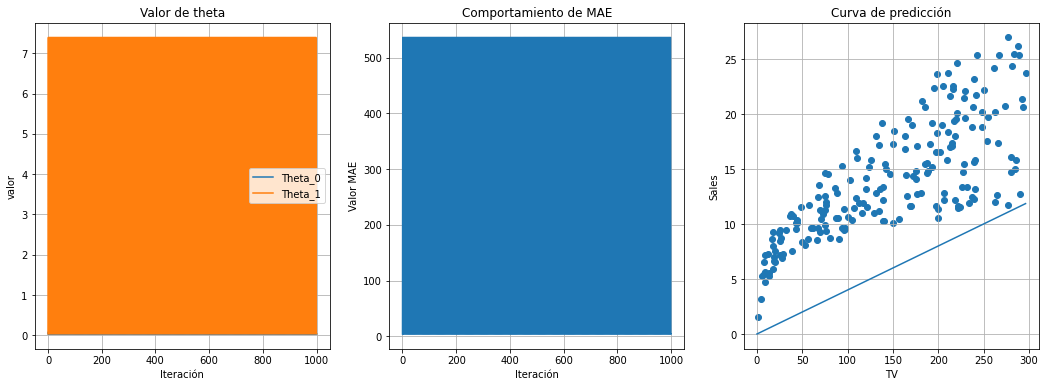

In [ ]:
import random
alpha=0.1
theta1=0
t0=0.034#0.05
t1=0.04#0.07
def gradiente_mae(alfa,x,y,iteraciones,t0,t1):

  t0_list=[]
  t1_list=[]
  t0_list.append(t0)
  t1_list.append(t1)
  it=[]
  it.append(0)
  error_c=[]
  gd0=0
  gd1=0
  m=len(x)
  error_c.append(MAE(x,y,t0,t1))
  for i in range(1,iteraciones+1):
    for j in range(len(x)):
      gd1=gd1+(((hipotesis(x[j],t0,t1)-y[j])/(abs(hipotesis(x[j],t0,t1)-y[j])))*x[j])

      gd0=gd0+(((hipotesis(x[j],t0,t1)-y[j]))/(abs(hipotesis(x[j],t0,t1)-y[j])))
      

    it.append(i)
    t0=t0-((alpha/(2*m))*gd0)
    t1=t1-((alpha/(2*m))*gd1)
    t0_list.append(t0)
    t1_list.append(t1)
    error_c.append(MAE(x,y,t0,t1))
  return [it,t0_list,t1_list,error_c]

resulgd=gradiente_mae(alpha,data['TV'],data['Sales'],1000,t0,t1) #
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mae_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)
plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MAE')
plt.title('Comportamiento de MAE')
plt.grid()

plt.subplot(1,3,3)
plotpl(data['TV'],data['Sales'],t0_r[mae_r.index(min(mae_r))],t1_r[mae_r.index(min(mae_r))])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MAE de: ',min(mae_r))
print('Con un t0= ',t0_r[mae_r.index(min(mae_r))])
print('Con un t1= ',t1_r[mae_r.index(min(mae_r))])

# Uso de  Gradiente descendiente 
MSE
Radio vs sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


El minimo encontrado fue un MSE de:  19.955851947087105
Con un t0=  0.7726311094759767
Con un t1=  0.4314225160894022


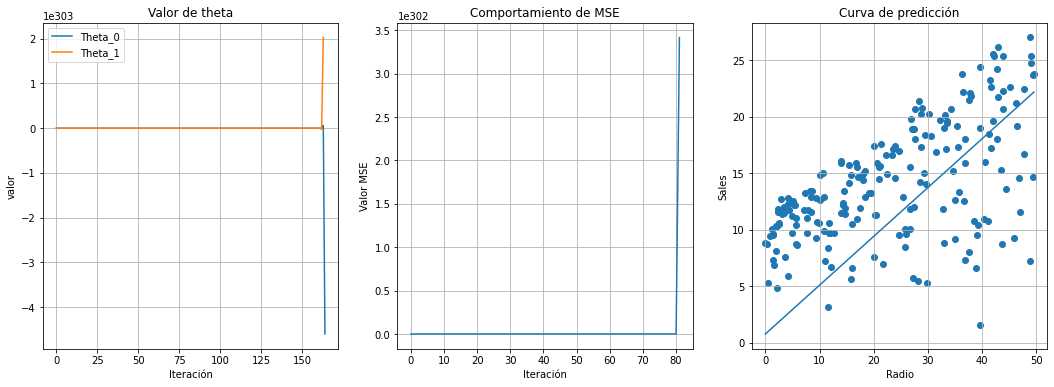

In [ ]:
alpha=0.1
t0r=random.random()#7
t1r=random.random()#0.27

resulgd=gradiente_mse(alpha,data['Radio'],data['Sales'],400,t0r,t1r)
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mse_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)

plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MSE')
plt.title('Comportamiento de MSE')
plt.grid()

plt.subplot(1,3,3)
plotpl(data['Radio'],data['Sales'],t0_r[mse_r.index(min(mse_r))],t1_r[mse_r.index(min(mse_r))])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MSE de: ',min(mse_r))
print('Con un t0= ',t0_r[mse_r.index(min(mse_r))])
print('Con un t1= ',t1_r[mse_r.index(min(mse_r))])

**Gradiente decendiente**

MAE Radio vs sales

El minimo encontrado fue un MAE de:  1.8728508095355278
Con un t0=  12.839270407938443
Con un t1=  0.11596316801194195


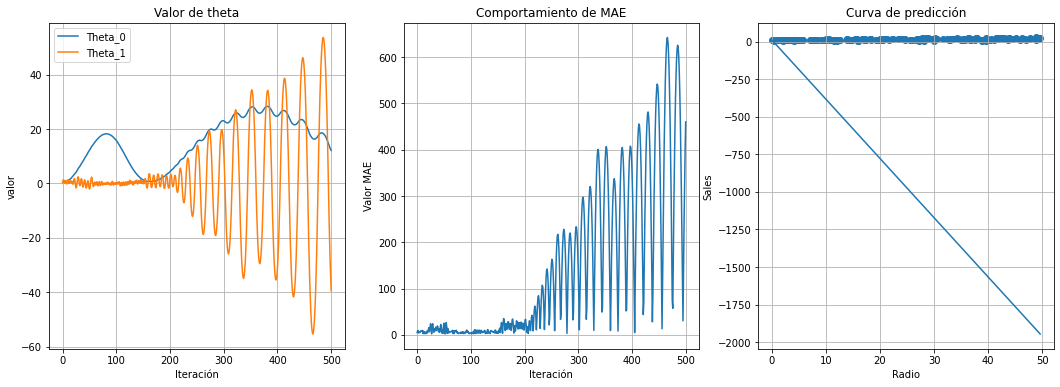

In [ ]:
alpha=0.1
t0r=random.random()#7
t1r=random.random()#0.27

resulgd=gradiente_mae(alpha,data['Radio'],data['Sales'],500,t0r,t1r) #
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mae_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)
plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MAE')
plt.title('Comportamiento de MAE')
plt.grid()

plt.subplot(1,3,3)
plotpl(data['Radio'],data['Sales'],t0_r[-1],t1_r[-1])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MAE de: ',min(mae_r))
print('Con un t0= ',t0_r[mae_r.index(min(mae_r))])
print('Con un t1= ',t1_r[mae_r.index(min(mae_r))])

# Uso del gradiente descendiente

MSE Newspaper vs sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


El minimo encontrado fue un MSE de:  36.074085612229105
Con un t0=  0.6530213381234167
Con un t1=  0.32826974122059227


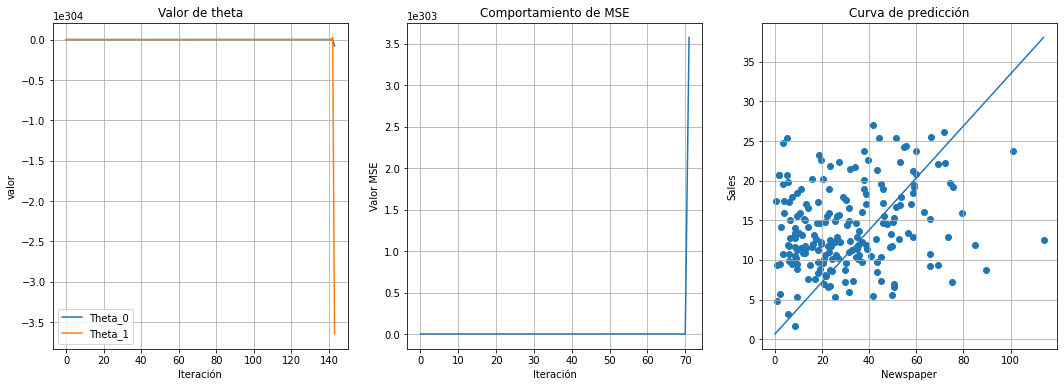

In [ ]:
alpha=0.1
t0n=random.random()#5
t1n=random.random()#0.3

resulgd=gradiente_mse(alpha,data['Newspaper'],data['Sales'],500,t0n,t1n)
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mse_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)

plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MSE')
plt.title('Comportamiento de MSE')
plt.grid()

plt.subplot(1,3,3)
plotpl(data['Newspaper'],data['Sales'],t0_r[mse_r.index(min(mse_r))],t1_r[mse_r.index(min(mse_r))])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MSE de: ',min(mse_r))
print('Con un t0= ',t0_r[mse_r.index(min(mse_r))])
print('Con un t1= ',t1_r[mse_r.index(min(mse_r))])

**Uso de Gradiente decendiente**

MAE Newspaper vs Sales

El minimo encontrado fue un MAE de:  2.1007307545026292
Con un t0=  13.008917339607384
Con un t1=  0.045118214621952646


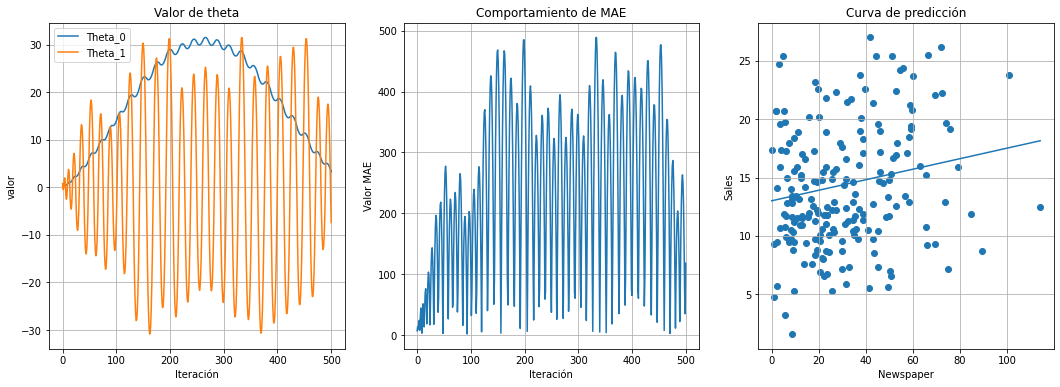

In [ ]:
alpha=0.1
t0n=random.random()#5
t1n=random.random()#0.3


resulgd=gradiente_mae(alpha,data['Newspaper'],data['Sales'],500,t0n,t1n) #
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mae_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)
plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MAE')
plt.title('Comportamiento de MAE')
plt.grid()

plt.subplot(1,3,3)
plotpl(data['Newspaper'],data['Sales'],t0_r[mae_r.index(min(mae_r))],t1_r[mae_r.index(min(mae_r))])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MAE de: ',min(mae_r))
print('Con un t0= ',t0_r[mae_r.index(min(mae_r))])
print('Con un t1= ',t1_r[mae_r.index(min(mae_r))])

# Base de datos articulos

Analisis estadistico

In [ ]:
art=pd.read_csv('/content/drive/MyDrive/Programación/Practica_regresion/articulos_ml.csv')
print(art)
art['Word count'] = art['Word count'].fillna(0) #se llena con 0 los nan values
art['# of Links'] = art['# of Links'].fillna(0)
art['# of comments'] = art['# of comments'].fillna(0)
art['# Images video'] = art['# Images video'].fillna(0)
art['Elapsed days'] = art['Elapsed days'].fillna(0)
art['# Shares'] = art['# Shares'].fillna(0)

                                                 Title  \
0    What is Machine Learning and how do we use it ...   
1     10 Companies Using Machine Learning in Cool Ways   
2    How Artificial Intelligence Is Revolutionizing...   
3    Dbrain and the Blockchain of Artificial Intell...   
4    Nasa finds entire solar system filled with eig...   
..                                                 ...   
156  [Log] 83: How Google Uses Machine Learning And...   
157  [Log] 84: Zuck Knows If You've Been Bad Or Goo...   
158  [Log] 85: Microsoft Improves Windows Phone Voi...   
159  [Log] 86: How Google's Acquisition Of DNNresea...   
160   [Log] 87: Google's Cloud Is Eating Apple's Lunch   

                                                   url  Word count  \
0    https://blog.signals.network/what-is-machine-l...        1888   
1                                                  NaN        1742   
2                                                  NaN         962   
3                      

**Covarianza valores vs shares**


In [ ]:
print('Word count vs # Shares: ',covarianza(art['Word count'],art['# Shares']))
print('# of Links vs # Shares:',covarianza(art['# of Links'],art['# Shares']))
print('# of comments vs # Shares:',covarianza(art['# of comments'],art['# Shares']))
print('# Images video vs # Shares:',covarianza(art['# Images video'],art['# Shares']))
print('Elapsed days vs # Shares:',covarianza(art['Elapsed days'],art['# Shares']))

Word count vs # Shares:  6981978.853362141
# of Links vs # Shares 587958.9975695381
# of comments vs # Shares 142784.83796921413
# Images video vs # Shares 9167.630029705639
Elapsed days vs # Shares 1604699.6151768835


**Covarianza entre todos**


In [ ]:
col_namesxy=['Word count','# of Links','# of comments','# Images video','Elapsed days','# Shares']
col_namesx=['Word count','# of Links','# of comments','# Images video','Elapsed days']
cov_todos=np.array([['    ']+col_namesxy])
#print(cov_todos)
#f=pd.DataFrame(m,columns=[col_namesx])
for col in col_namesxy:
  #fila=[]
  fila=[col]
  for colm in col_namesxy:
    fila.append(cov(art[col],art[colm],bias=False)[0,1])
    #print(fila)
  cov_todos=np.append(cov_todos,[fila],axis=0)

r=pd.DataFrame(cov_todos)
print(r)



                0                    1                   2  \
0                           Word count          # of Links   
1      Word count     1303979.88152174  18716.643478260885   
2      # of Links   18716.643478260885   2234.606521739144   
3   # of comments   1533.8777173913045   67.42853260869555   
4  # Images video   1810.2739130434788   3.407336956521741   
5    Elapsed days  -21851.301358695655  319.73885869565225   
6        # Shares    7025616.221195655   591633.7413043476   

                    3                   4                    5  \
0       # of comments      # Images video         Elapsed days   
1  1533.8777173913045  1810.2739130434788  -21851.301358695655   
2   67.42853260869555   3.407336956521741   319.73885869565225   
3  150.54860248447213  -1.375155279503107    52.76409161490682   
4  -1.375155279503107  11.684704968944084    82.05989906832292   
5   52.76409161490682   82.05989906832292   13073.071972049693   
6   143677.2432065217   9224.927717391301

**Correlación de Pearson**

Word count 0.14262150847304
# of Links 0.29012720337832265
# of comments 0.27144739034075294
# Images video 0.0625590499668279
Elapsed days 0.3273760198137792


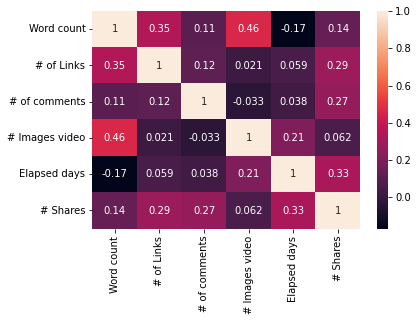

In [ ]:
import seaborn as sns

def pearson(x,y):
  p=(cov(x,y)[0,1])/((np.std(x))*(np.std(y)))
  return p

for c in col_namesx:
  print(c,pearson(art[c],art['# Shares']))

sns.heatmap(art[col_namesxy].corr(),annot=True) #mapa de calor de relación de los valores todos con todos

**Gráficas**

Word count vs # Shares
MSE=  968979423.0434783
MAE=  11961.695652173912
# of Links vs # Shares
MSE=  1251989102.1024845
MAE=  13568.499999999998
# of comments vs # Shares
MSE=  1293607682.5838509
MAE=  13665.217391304346
# Images video vs # Shares
MSE=  986368778.795031
MAE=  14184.86956521739
Elapsed days vs # Shares
MSE=  944522033.7639751
MAE=  14627.658385093167


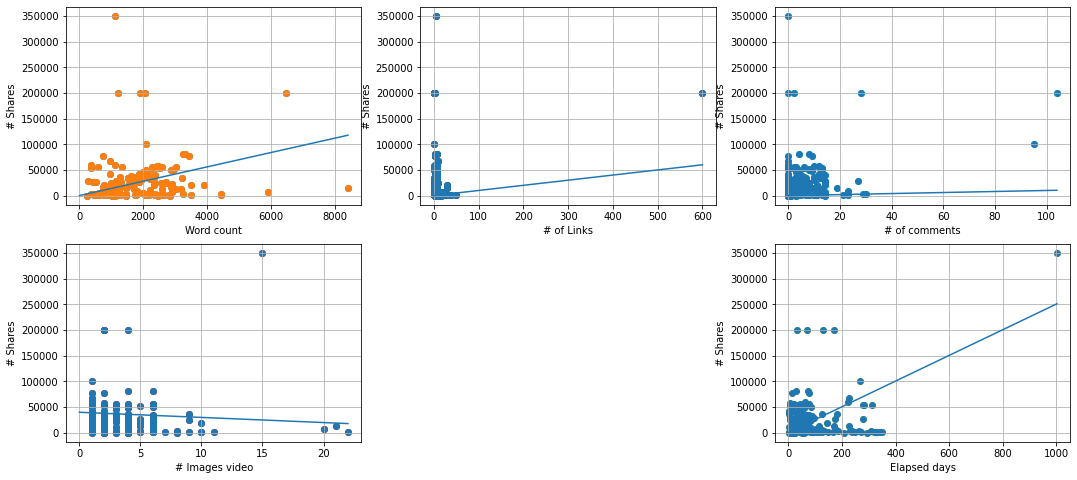

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(2,3,1)
plt.scatter(art['Word count'],art['# Shares'])
#plt.grid()
t0wc=4
t1wc=14
plotpl(art['Word count'],art['# Shares'],t0wc,t1wc)
plt.xlabel('Word count')
plt.ylabel('# Shares')
print('Word count vs # Shares')
print('MSE= ',MSE(art['Word count'],art['# Shares'],t0wc,t1wc))
print('MAE= ',MAE(art['Word count'],art['# Shares'],t0wc,t1wc))


plt.subplot(2,3,2)
plt.scatter(art['# of Links'],art['# Shares'],color='black')
plt.xlabel('# of Links')
plt.ylabel('# Shares')
t0of=15
t1of=100
plotpl(art['# of Links'],art['# Shares'],t0of,t1of)
print('# of Links vs # Shares')
print('MSE= ',MSE(art['# of Links'],art['# Shares'],t0of,t1of))
print('MAE= ',MAE(art['# of Links'],art['# Shares'],t0of,t1of))

plt.subplot(2,3,3)
plt.scatter(art['# of comments'],art['# Shares'],color='cyan')
plt.xlabel('# of comments')
plt.ylabel('# Shares')
t0oc=10
t1oc=100
plotpl(art['# of comments'],art['# Shares'],t0oc,t1oc)
print('# of comments vs # Shares')
print('MSE= ',MSE(art['# of comments'],art['# Shares'],t0oc,t1oc))
print('MAE= ',MAE(art['# of comments'],art['# Shares'],t0oc,t1oc))

plt.subplot(2,3,4)
plt.scatter(art['# Images video'],art['# Shares'],color='red')
plt.xlabel('# Images video')
plt.ylabel('# Shares')
t0iv=40000
t1iv=-1000
plotpl(art['# Images video'],art['# Shares'],t0iv,t1iv)
print('# Images video vs # Shares')
print('MSE= ',MSE(art['# Images video'],art['# Shares'],t0iv,t1iv))
print('MAE= ',MAE(art['# Images video'],art['# Shares'],t0iv,t1iv))

plt.subplot(2,3,6)
plt.scatter(art['Elapsed days'],art['# Shares'],color='yellow')
plt.xlabel('Elapsed days')
plt.ylabel('# Shares')
t0ed=800
t1ed=250
plotpl(art['Elapsed days'],art['# Shares'],t0ed,t1ed)
print('Elapsed days vs # Shares')
print('MSE= ',MSE(art['Elapsed days'],art['# Shares'],t0ed,t1ed))
print('MAE= ',MAE(art['Elapsed days'],art['# Shares'],t0ed,t1ed))


**Uso de minimos cuadrados con Articulos**


In [ ]:
t_r_wc=min_cuad(art['Word count'],art['# Shares'])
print(t_r_wc)
print(MSE(art['Word count'],art['# Shares'],t_r_wc[0],t_r_wc[1]))
print(MAE(art['Word count'],art['# Shares'],t_r_wc[0],t_r_wc[1]))

t_r_wc=min_cuad(art['# of Links'],art['# Shares'])
print(t_r_wc)
print(MSE(art['# of Links'],art['# Shares'],t_r_wc[0],t_r_wc[1]))
print(MAE(art['Word count'],art['# Shares'],t_r_wc[0],t_r_wc[1]))

t_r_wc=min_cuad(art['# of comments'],art['# Shares'])
print(t_r_wc)
print(MSE(art['# of comments'],art['# Shares'],t_r_wc[0],t_r_wc[1]))
print(MAE(art['Word count'],art['# Shares'],t_r_wc[0],t_r_wc[1]))

t_r_wc=min_cuad(art['# Images video'],art['# Shares'])
print(t_r_wc)
print(MSE(art['# Images video'],art['# Shares'],t_r_wc[0],t_r_wc[1]))
print(MAE(art['Word count'],art['# Shares'],t_r_wc[0],t_r_wc[1]))

t_r_wc=min_cuad(art['Elapsed days'],art['# Shares'])
print(t_r_wc)
print(MSE(art['Elapsed days'],art['# Shares'],t_r_wc[0],t_r_wc[1]))
print(MAE(art['Word count'],art['# Shares'],t_r_wc[0],t_r_wc[1]))


[18205.753574904906, 5.387825625803971]
917466962.7774607
12294.816571093977
[25369.818621895305, 264.75969507324993]
858441882.6139004
238297.097446539
[21232.27662261109, 954.3578673959524]
868141888.3395554
859505.9579851676
[25050.291477019782, 789.4874318101781]
932656940.7259738
712350.5868034082
[15828.470524693535, 123.51565043197498]
837173046.711687
107053.98933115955


**Uso de gradiente decendiente**

MSE Word count vs shares

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


El minimo encontrado fue un MSE de:  1290227518.6962483
Con un t0=  0.44047344929403964
Con un t1=  0.6530827150060405


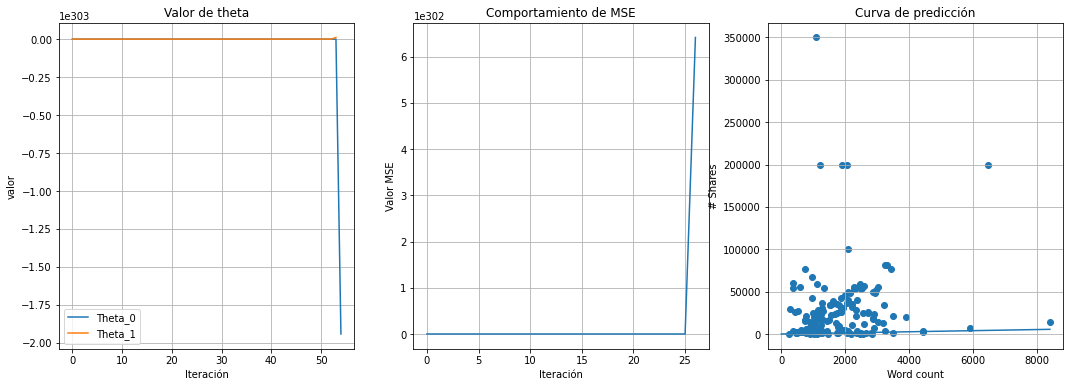

In [ ]:
alpha=0.1
t0wc=random.random()#5
t1wc=random.random()#0.3

resulgd=gradiente_mse(alpha,art['Word count'],art['# Shares'],1000,t0wc,t1wc)
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mse_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)

plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MSE')
plt.title('Comportamiento de MSE')
plt.grid()

plt.subplot(1,3,3)
plotpl(art['Word count'],art['# Shares'],t0_r[mse_r.index(min(mse_r))],t1_r[mse_r.index(min(mse_r))])
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MSE de: ',min(mse_r))
print('Con un t0= ',t0_r[mse_r.index(min(mse_r))])
print('Con un t1= ',t1_r[mse_r.index(min(mse_r))])

**Uso de gradiente decendiente**

MAE word count vs shares

El minimo encontrado fue un MAE de:  11563.208278374834
Con un t0=  1.355262154369675
Con un t1=  8.441863142528376


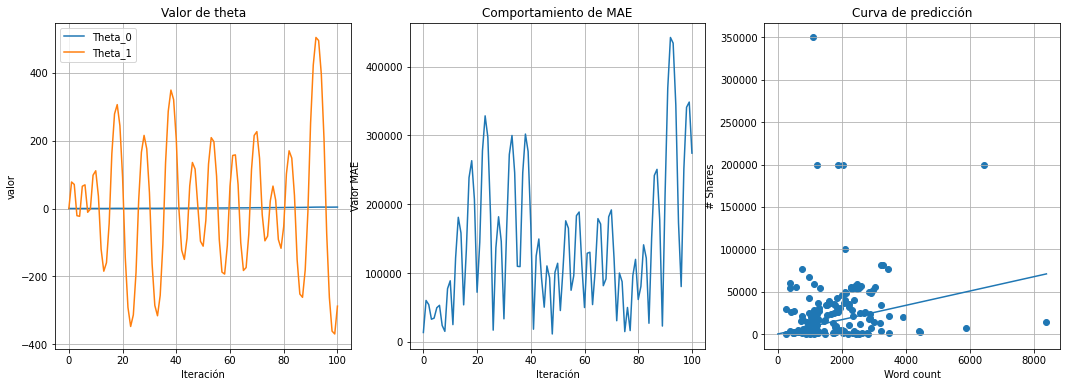

In [ ]:
alpha=0.1
t0wc=random.random()
t1wc=random.random()


resulgd=gradiente_mae(alpha,art['Word count'],art['# Shares'],100,t0wc,t1wc) #
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mae_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)
plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MAE')
plt.title('Comportamiento de MAE')
plt.grid()

plt.subplot(1,3,3)
plotpl(art['Word count'],art['# Shares'],t0_r[mae_r.index(min(mae_r))],t1_r[mae_r.index(min(mae_r))])
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MAE de: ',min(mae_r))
print('Con un t0= ',t0_r[mae_r.index(min(mae_r))])
print('Con un t1= ',t1_r[mae_r.index(min(mae_r))])

**Uso de Gradiente decendiente**

MSE # of Links vs # Shares

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


El minimo encontrado fue un MSE de:  1326424539.5959296
Con un t0=  0.19524739680601
Con un t1=  0.4663531900224648


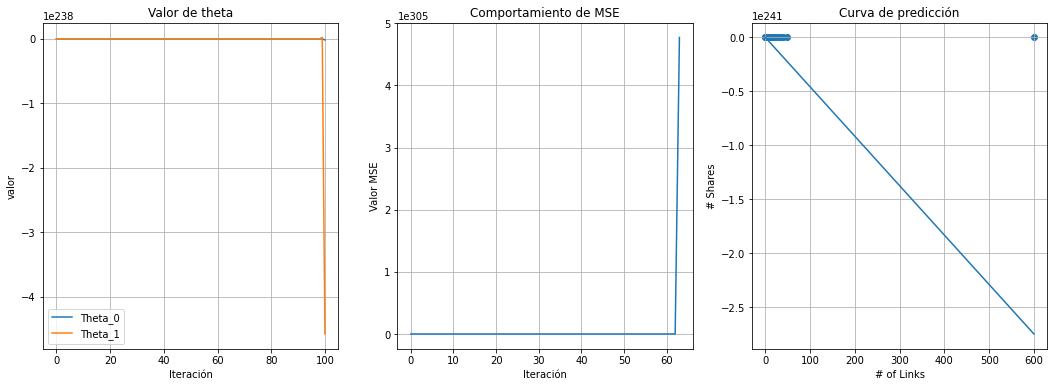

In [ ]:
alpha=0.1
t0ol=random.random()#5
t1ol=random.random()#0.3

resulgd=gradiente_mse(alpha,art['# of Links'],art['# Shares'],100,t0ol,t1ol)
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mse_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)

plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MSE')
plt.title('Comportamiento de MSE')
plt.grid()

plt.subplot(1,3,3)
plotpl(art['# of Links'],art['# Shares'],t0_r[-1],t1_r[-1])
plt.xlabel('# of Links')
plt.ylabel('# Shares')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MSE de: ',min(mse_r))
print('Con un t0= ',t0_r[mse_r.index(min(mse_r))])
print('Con un t1= ',t1_r[mse_r.index(min(mse_r))])

**Uso de Gradiente decendiente**

MAE # of Links vs # Shares

El minimo encontrado fue un MAE de:  12244.400540347733
Con un t0=  2457.2076005338367
Con un t1=  330.863800869137


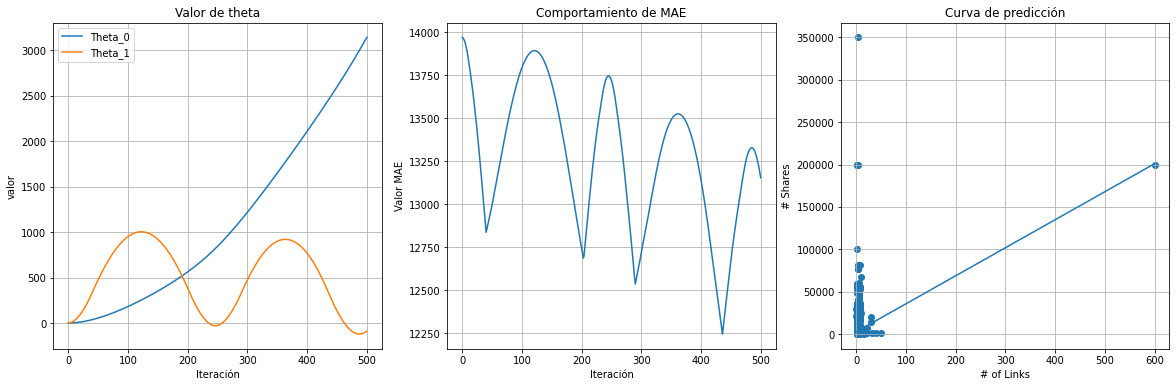

In [ ]:
alpha=0.1
t0ol=random.random()#5
t1ol=random.random()#0.3

resulgd=gradiente_mae(alpha,art['# of Links'],art['# Shares'],500,t0ol,t1ol) #
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mae_r=resulgd[3]

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)
plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MAE')
plt.title('Comportamiento de MAE')
plt.grid()

plt.subplot(1,3,3)
plotpl(art['# of Links'],art['# Shares'],t0_r[mae_r.index(min(mae_r))],t1_r[mae_r.index(min(mae_r))])
plt.xlabel('# of Links')
plt.ylabel('# Shares')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MAE de: ',min(mae_r))
print('Con un t0= ',t0_r[mae_r.index(min(mae_r))])
print('Con un t1= ',t1_r[mae_r.index(min(mae_r))])

**Uso de Gradiente decendiente**

MSE # of comments vs # Shares

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


El minimo encontrado fue un MSE de:  1326516624.902375
Con un t0=  0.3276443108343242
Con un t1=  0.8989996270386028


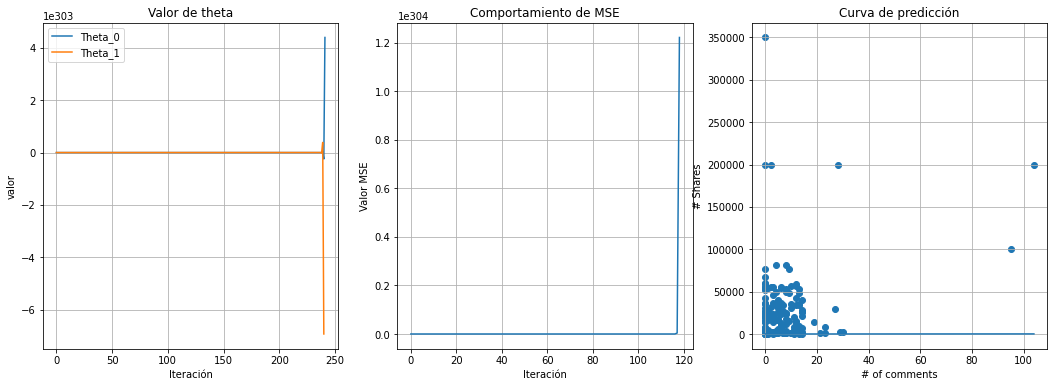

In [ ]:
alpha=0.1
t0oc=random.random()#5
t1oc=random.random()#0.3

resulgd=gradiente_mse(alpha,art['# of comments'],art['# Shares'],300,t0oc,t1oc)
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mse_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)

plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MSE')
plt.title('Comportamiento de MSE')
plt.grid()

plt.subplot(1,3,3)
plotpl(art['# of comments'],art['# Shares'],t0_r[mse_r.index(min(mse_r))],t1_r[mse_r.index(min(mse_r))])
plt.xlabel('# of comments')
plt.ylabel('# Shares')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MSE de: ',min(mse_r))
print('Con un t0= ',t0_r[mse_r.index(min(mse_r))])
print('Con un t1= ',t1_r[mse_r.index(min(mse_r))])

**Uso de Gradiente decendiente**

MAE # of comments vs # Shares

El minimo encontrado fue un MAE de:  11818.960527095736
Con un t0=  1864.6369563001128
Con un t1=  1232.6434475718647


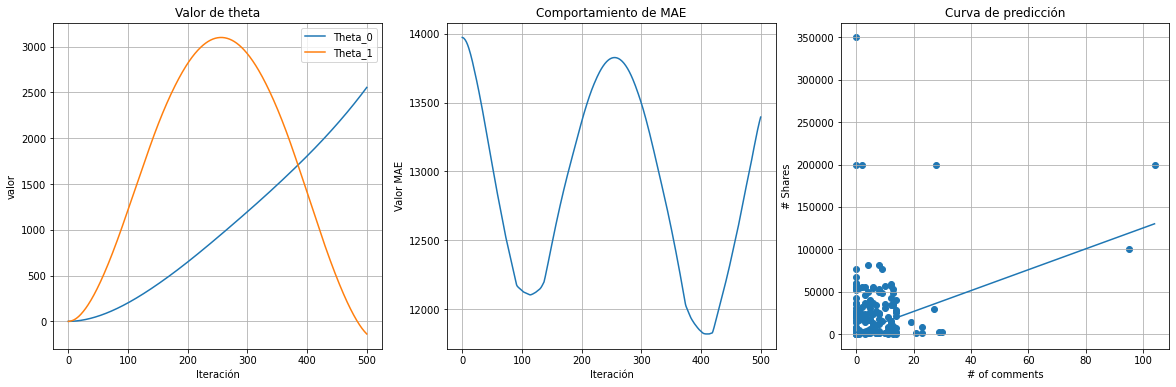

In [ ]:
alpha=0.1
t0oc=random.random()#5
t1oc=random.random()#0.3

resulgd=gradiente_mae(alpha,art['# of comments'],art['# Shares'],500,t0oc,t1oc) #
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mae_r=resulgd[3]

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)
plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MAE')
plt.title('Comportamiento de MAE')
plt.grid()

plt.subplot(1,3,3)
plotpl(art['# of comments'],art['# Shares'],t0_r[mae_r.index(min(mae_r))],t1_r[mae_r.index(min(mae_r))])
plt.xlabel('# of comments')
plt.ylabel('# Shares')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MAE de: ',min(mae_r))
print('Con un t0= ',t0_r[mae_r.index(min(mae_r))])
print('Con un t1= ',t1_r[mae_r.index(min(mae_r))])

**Uso de Gradiente decendiente**

MSE # Images video vs Shares

El minimo encontrado fue un MSE de:  965102383.2267076
Con un t0=  36075.07865173999
Con un t1=  -1410.2243221582949


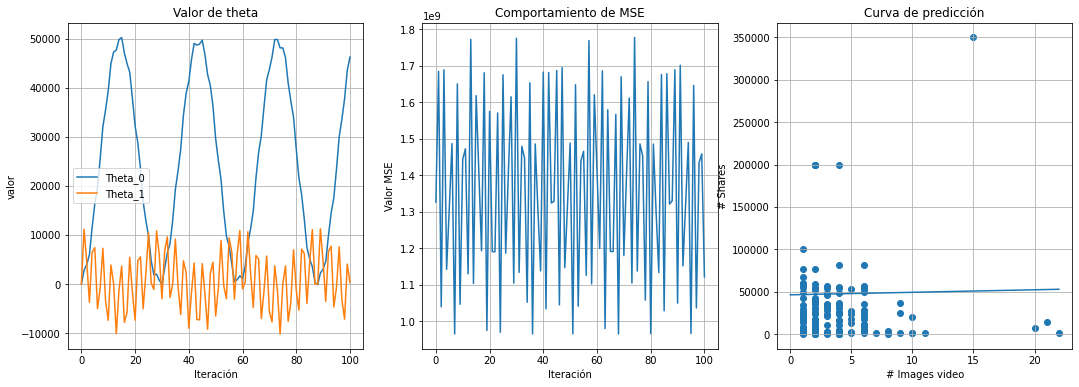

In [ ]:
alpha=0.1
t0iv=random.random()#5
t1iv=random.random()#0.3

resulgd=gradiente_mse(alpha,art['# Images video'],art['# Shares'],100,t0iv,t1iv)
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mse_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)

plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MSE')
plt.title('Comportamiento de MSE')
plt.grid()

plt.subplot(1,3,3)
plotpl(art['# Images video'],art['# Shares'],t0_r[-1],t1_r[-1])
plt.xlabel('# Images video')
plt.ylabel('# Shares')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MSE de: ',min(mse_r))
print('Con un t0= ',t0_r[mse_r.index(min(mse_r))])
print('Con un t1= ',t1_r[mse_r.index(min(mse_r))])

**Uso de Gradiente decendiente**

MAE # Images video vs Shares

El minimo encontrado fue un MAE de:  11930.943729527053
Con un t0=  9902.873065211568
Con un t1=  998.0482010872075


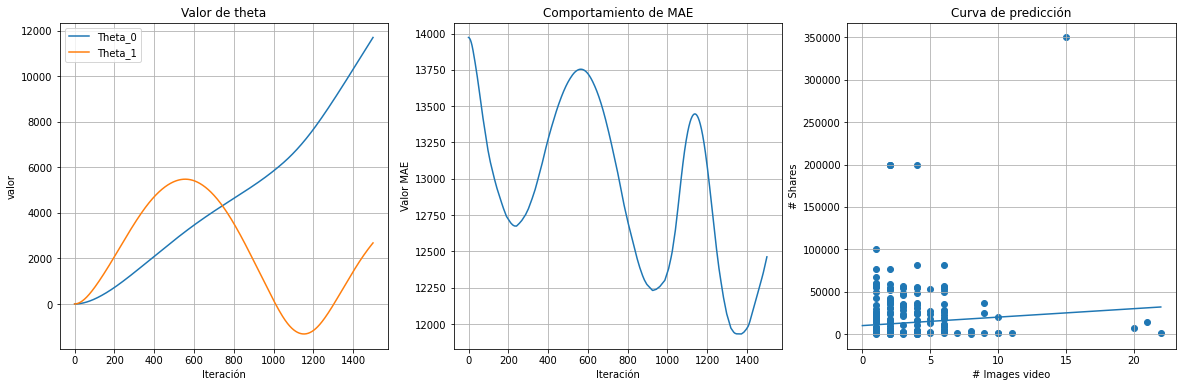

In [ ]:
alpha=0.1
t0iv=random.random()#5
t1iv=random.random()#0.3

resulgd=gradiente_mae(alpha,art['# Images video'],art['# Shares'],1500,t0iv,t1iv) #
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mae_r=resulgd[3]

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)
plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MAE')
plt.title('Comportamiento de MAE')
plt.grid()

plt.subplot(1,3,3)
plotpl(art['# Images video'],art['# Shares'],t0_r[mae_r.index(min(mae_r))],t1_r[mae_r.index(min(mae_r))])
plt.xlabel('# Images video')
plt.ylabel('# Shares')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MAE de: ',min(mae_r))
print('Con un t0= ',t0_r[mae_r.index(min(mae_r))])
print('Con un t1= ',t1_r[mae_r.index(min(mae_r))])

**Uso de Gradiente decendiente**

MSE Elapsed days vs Shares

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


El minimo encontrado fue un MSE de:  1325670534.5322537
Con un t0=  0.41021396273565036
Con un t1=  0.26447013501874284


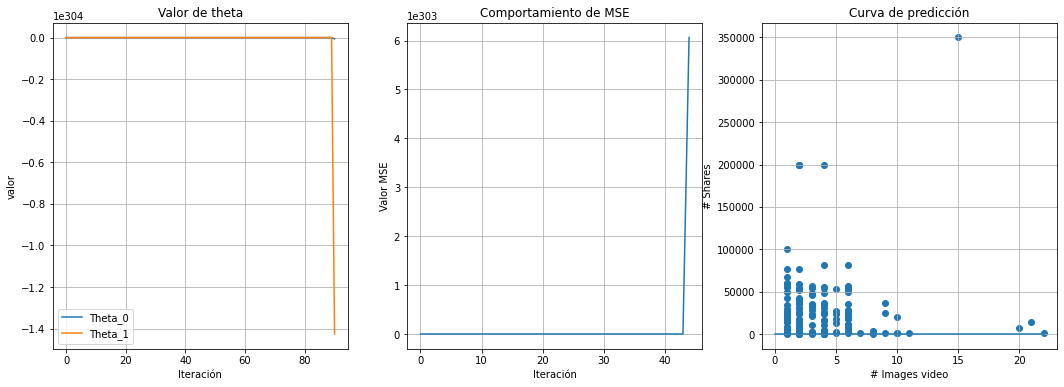

In [ ]:
alpha=0.1
t0ed=random.random()#5
t1ed=random.random()#0.3

resulgd=gradiente_mse(alpha,art['Elapsed days'],art['# Shares'],1000,t0ed,t1ed)
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mse_r=resulgd[3]

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)

plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MSE')
plt.title('Comportamiento de MSE')
plt.grid()

plt.subplot(1,3,3)
plotpl(art['# Images video'],art['# Shares'],t0_r[mse_r.index(min(mse_r))],t1_r[mse_r.index(min(mse_r))])
plt.xlabel('# Images video')
plt.ylabel('# Shares')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MSE de: ',min(mse_r))
print('Con un t0= ',t0_r[mse_r.index(min(mse_r))])
print('Con un t1= ',t1_r[mse_r.index(min(mse_r))])

**Uso de Gradiente decendiente**

MAE Elapsed days vs Shares

El minimo encontrado fue un MAE de:  11587.697110128765
Con un t0=  14303.191215721276
Con un t1=  -30.1474562536989


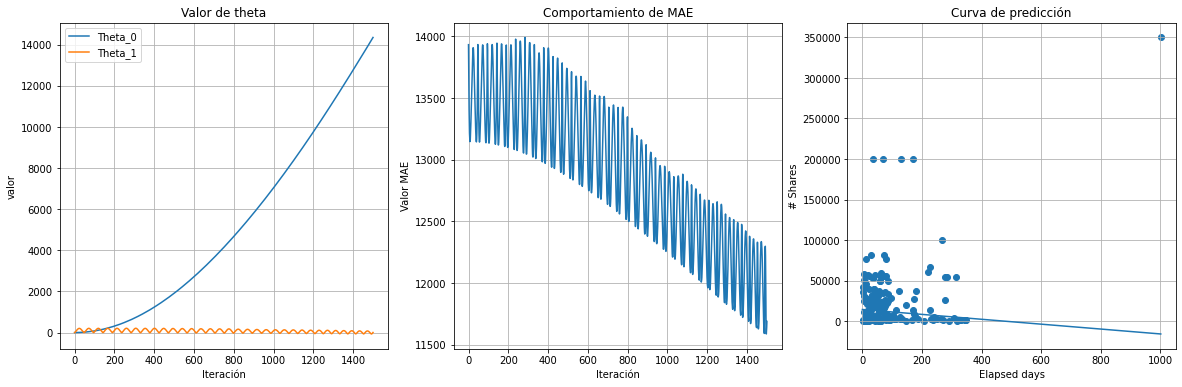

In [ ]:
alpha=0.1
t0ed=random.random()#5
t1ed=random.random()#0.3

resulgd=gradiente_mae(alpha,art['Elapsed days'],art['# Shares'],1500,t0ed,t1ed) #
#print()
itr=resulgd[0]
t0_r=resulgd[1]
t1_r=resulgd[2]
mae_r=resulgd[3]

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.plot(resulgd[0],resulgd[1])
plt.plot(resulgd[0],resulgd[2])
plt.xlabel('Iteración')
plt.ylabel('valor')
plt.title('Valor de theta')
plt.legend(['Theta_0','Theta_1'])
plt.grid()
plt.subplot(1,3,2)
plt.plot(resulgd[0],resulgd[3])
plt.xlabel('Iteración')
plt.ylabel('Valor MAE')
plt.title('Comportamiento de MAE')
plt.grid()

plt.subplot(1,3,3)
plotpl(art['Elapsed days'],art['# Shares'],t0_r[mae_r.index(min(mae_r))],t1_r[mae_r.index(min(mae_r))])
plt.xlabel('Elapsed days')
plt.ylabel('# Shares')
plt.title('Curva de predicción')


print('El minimo encontrado fue un MAE de: ',min(mae_r))
print('Con un t0= ',t0_r[mae_r.index(min(mae_r))])
print('Con un t1= ',t1_r[mae_r.index(min(mae_r))])